In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, f_regression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,StratifiedKFold

DATASET HAS BEEN TAKEN FROM KAGGLE

DATA:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

# GOAL

EDA of Working Environment in Tech Companies and building a model for the employees, predicting whether or not they should consider seeking treatment/therapy if they are suffering from mental illness.

In [77]:
df=pd.read_csv('mental health in tech survey.csv')

In [78]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [79]:
df=df.drop(['Timestamp','comments'],axis=1)

In [80]:
df=df.loc[df.Country=='United States']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        751 non-null    int64 
 1   Gender                     751 non-null    object
 2   Country                    751 non-null    object
 3   state                      740 non-null    object
 4   self_employed              740 non-null    object
 5   family_history             751 non-null    object
 6   treatment                  751 non-null    object
 7   work_interfere             607 non-null    object
 8   no_employees               751 non-null    object
 9   remote_work                751 non-null    object
 10  tech_company               751 non-null    object
 11  benefits                   751 non-null    object
 12  care_options               751 non-null    object
 13  wellness_program           751 non-null    object
 14  seek_help

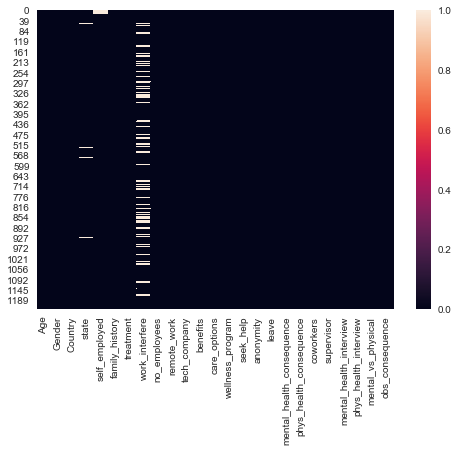

In [82]:
sns.heatmap(df.isnull())

In [83]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [84]:
df=df.dropna()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 18 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        588 non-null    int64 
 1   Gender                     588 non-null    object
 2   Country                    588 non-null    object
 3   state                      588 non-null    object
 4   self_employed              588 non-null    object
 5   family_history             588 non-null    object
 6   treatment                  588 non-null    object
 7   work_interfere             588 non-null    object
 8   no_employees               588 non-null    object
 9   remote_work                588 non-null    object
 10  tech_company               588 non-null    object
 11  benefits                   588 non-null    object
 12  care_options               588 non-null    object
 13  wellness_program           588 non-null    object
 14  seek_hel

In [86]:
df.Age.describe()

count    588.000000
mean      33.641156
std       14.488748
min       -1.000000
25%       28.000000
50%       32.000000
75%       38.000000
max      329.000000
Name: Age, dtype: float64

In [87]:
df=df.loc[(df.Age>18) & (df.Age<100),:]

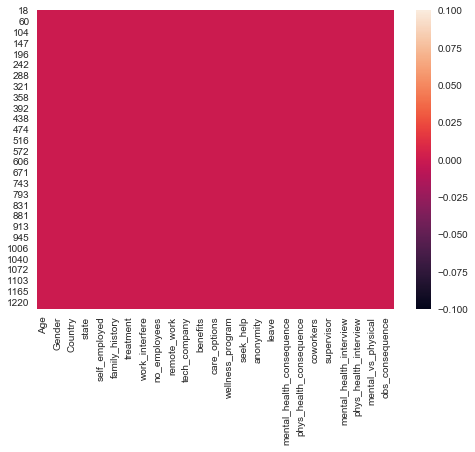

In [88]:
sns.heatmap(df.isnull())

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 18 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        582 non-null    int64 
 1   Gender                     582 non-null    object
 2   Country                    582 non-null    object
 3   state                      582 non-null    object
 4   self_employed              582 non-null    object
 5   family_history             582 non-null    object
 6   treatment                  582 non-null    object
 7   work_interfere             582 non-null    object
 8   no_employees               582 non-null    object
 9   remote_work                582 non-null    object
 10  tech_company               582 non-null    object
 11  benefits                   582 non-null    object
 12  care_options               582 non-null    object
 13  wellness_program           582 non-null    object
 14  seek_hel

Some extreme values have been removed, following a normal distribution with max age between 28 to 35.

In [90]:
df.Gender.unique()

array(['male', 'Male', 'Female', 'female', 'M', 'Male-ish',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'm', 'f',
       'queer/she/they', 'non-binary', 'woman', 'Make', 'Nah',
       'Genderqueer', 'Female ', 'cis-female/femme', 'Male ',
       'Trans woman', 'msle', 'Female (trans)', 'Female (cis)', 'Mail',
       'cis male', 'Woman', 'femail'], dtype=object)

In [91]:
df['Gender']=df.Gender.replace(['male', 'Male', 'M', 'Male-ish','m','Male ','msle','Mail','Make'],'Male')
df['Gender']=df.Gender.replace(['Female', 'female','F','f','queer/she/they','woman','Female ','Woman','femail'],'Female')
df['Gender']=df.Gender.replace(['Trans-female', 'Cis Female', 'Cis Male','non-binary', 'Nah', 'Genderqueer', 'cis-female/femme','Trans woman', 'Female (trans)', 'Female (cis)', 'cis male', 'p'],'Others')

In [92]:
df.Gender.unique()

array(['Male', 'Female', 'Others'], dtype=object)

# EDA 

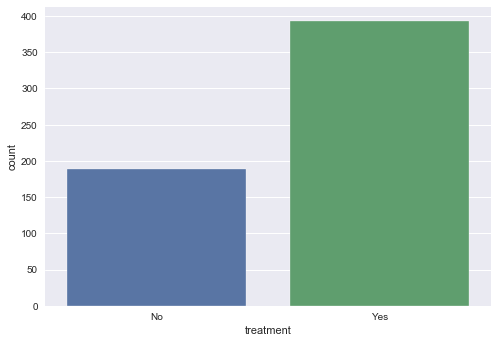

In [93]:
sns.countplot(df.treatment)

TARGET CLASS IMBALANCED

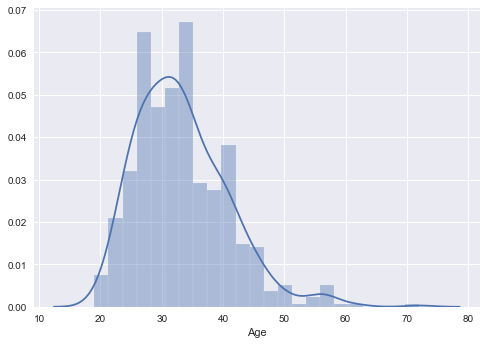

In [94]:
sns.distplot(df.Age)

Max range between 28 to 35

In [95]:
df['age_group']=pd.cut(df.Age,bins = [18,29,55,80],labels=['Young','Middle','Old'])


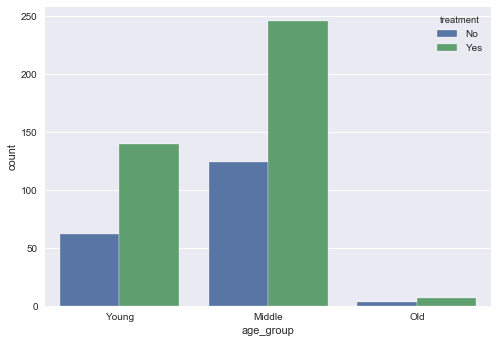

In [96]:
sns.countplot(df.age_group,hue=df.treatment)

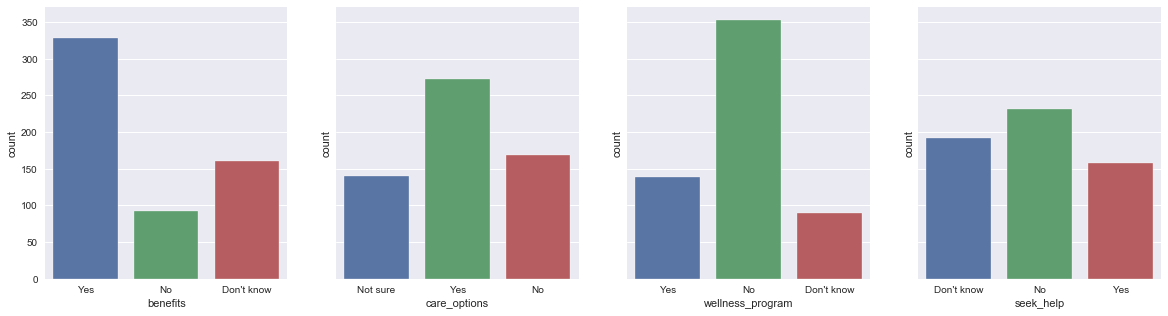

In [97]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(20,5))
sns.countplot('benefits',ax=ax1,data=df)
sns.countplot('care_options',data=df,ax=ax2)
sns.countplot('wellness_program',data=df,ax=ax3)
sns.countplot('seek_help',data=df,ax=ax4)


Most of the employers do provide mental health benefits, most of the employees are aware of the mental health care options as well but there is a significant proportion of population who are either unaware or do not seek help.
As a part of wellness program, majority of the employers DO NOT discuss or provide resources to learn about mental health issues or how to seek help.


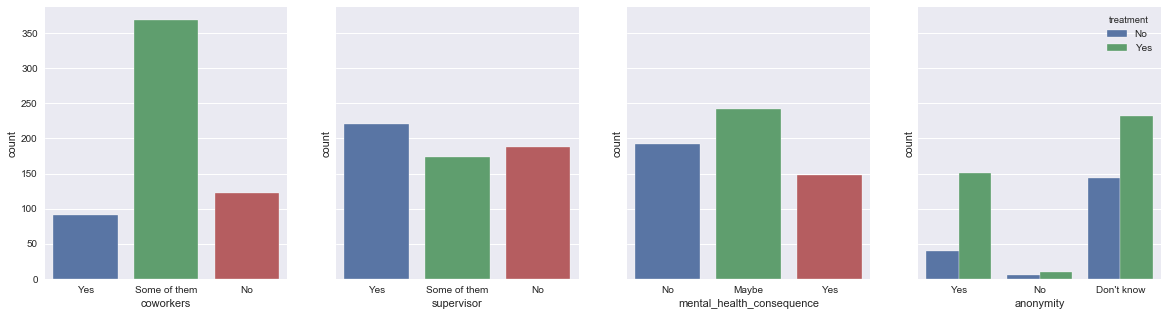

In [98]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(20,5))
sns.countplot('coworkers',ax=ax1,data=df)
sns.countplot('supervisor',data=df,ax=ax2)
sns.countplot('mental_health_consequence',data=df,ax=ax3)
sns.countplot(df.anonymity,hue=df.treatment,ax=ax4)

Looking above, employers are more comfortable in discussing this issue with thier supervisor whereas some with coworkers as well. Most of the employees are not sure about the fact whether discussing a mental health issue with your employer would have negative consequences or if thier anonymity is being protected or not. 
But it is clearly evident that the proportion of employees seeking treatment is different from those who know that thier anonymity is protected.



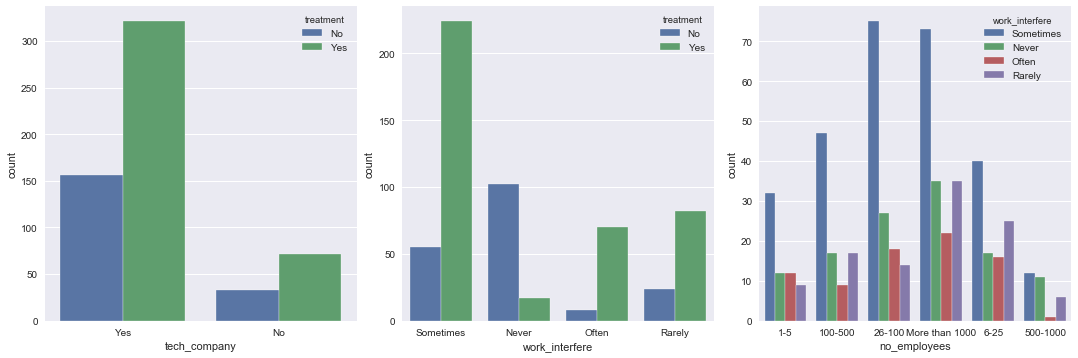

In [99]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5),sharey=False)
sns.countplot(x='work_interfere',data=df,hue='treatment',ax=ax2)
sns.countplot(df.tech_company,hue=df.treatment,ax=ax1)
sns.countplot(df.no_employees,hue=df.work_interfere,ax=ax3)
plt.tight_layout()

More than half of the employees sought some kind of treatment whether or not they are working in tech. Majority of the employees claim that mental illness interferes with thier work and they have to seek some kind of treatment.Also if there are lesser no. of employees the work load is greater per employee resulting in more stressful environment.

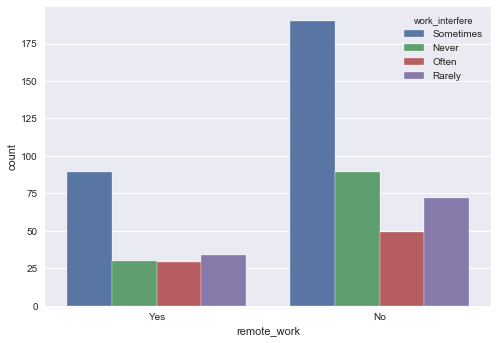

In [100]:
sns.countplot(df.remote_work,hue=df.work_interfere)

Comparing the proportions, its is almost equal whether or not they are working remotely

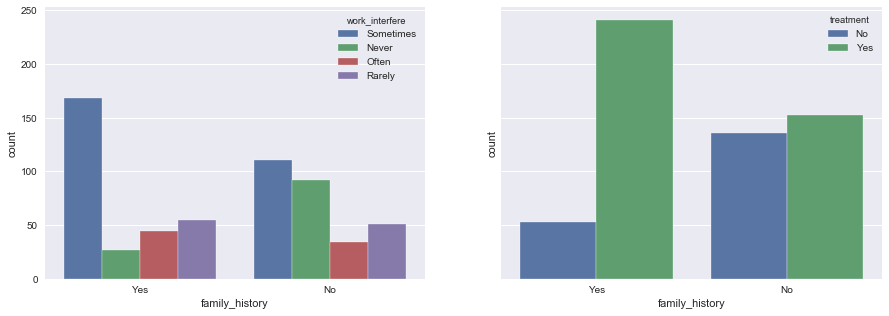

In [101]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5),sharey=True)
sns.countplot('family_history',data=df,hue='treatment',ax=ax2)
sns.countplot(df.family_history,hue=df.work_interfere,ax=ax1)


Here, It can be clearly seen that employees having a family history of mental illness have more difficulty in concentrating in thier work and have sought treatment, it plays a big role in contributing to mental illness in the employees. 

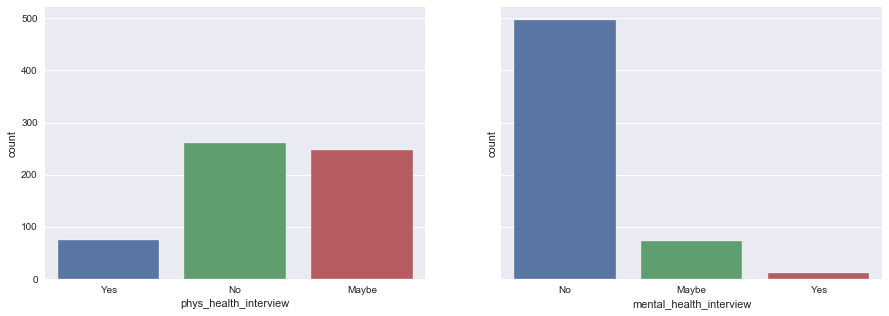

In [102]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5),sharey=True)
sns.countplot(df.mental_health_interview,ax=ax2)
sns.countplot(df.phys_health_interview,ax=ax1)


During interviews, employees don't consider sharing if they had any mental health issue

In [103]:
df.drop('Country',axis=1,inplace=True)

Text(0.5, 0, 'States')

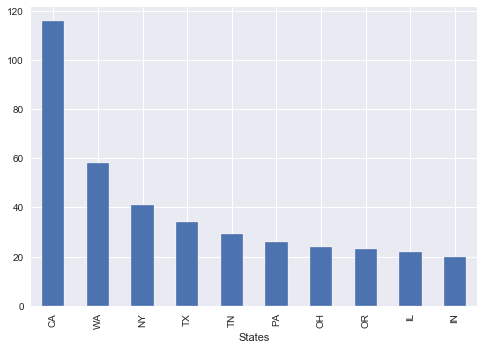

In [104]:
df.state.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('States')


The Silicon Valley in CA which is the hub of all the Tech Giants like Google,Facebook, Apple etc and several other tech based start-ups following the WA state(Amazon, Microsoft) has the most number employees bieng subjected to the highly competitive and stressful work environment.

According to the World Health Organization (WHO), one in four people suffer from mental health issue, with progressive urban centers — like Silicon Valley, San Francisco, etc. — often showing higher rates of manic depression, bipolar, and other like-minded illnesses.






Also in NYC Wall street, There is constant pressure to perform - to make money - in an ultra-competitive environment leading to a highly stressful environment.




In [105]:
df.head()

,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
18,46,Male,MD,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,Middle
20,29,Male,NY,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,Young
21,31,Male,NC,Yes,No,No,Never,1-5,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,Middle
22,46,Male,MA,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,Middle
23,41,Male,IA,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,Middle


In [106]:
df.drop('Age',axis=1,inplace=True)

In [107]:
df=df.reset_index(drop=True)

In [108]:
df

,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,Male,MD,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,Middle
1,Male,NY,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,Young
2,Male,NC,Yes,No,No,Never,1-5,Yes,Yes,No,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,Middle
3,Male,MA,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,Middle
4,Male,IA,No,No,Yes,Never,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Male,NC,No,Yes,Yes,Sometimes,100-500,Yes,Yes,Yes,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,Young
578,Male,UT,No,Yes,No,Rarely,More than 1000,No,No,Don't know,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,Middle
579,Male,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,Middle
580,Male,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,Middle


In [109]:
df.state.value_counts().sort_values(ascending=False).head(10)

CA    116
WA     58
NY     41
TX     34
TN     29
PA     26
OH     24
OR     23
IL     22
IN     20
Name: state, dtype: int64

In [110]:
top_10 = [x for x in df.state.value_counts().sort_values(ascending=False).head(10).index]
top_10

['CA', 'WA', 'NY', 'TX', 'TN', 'PA', 'OH', 'OR', 'IL', 'IN']

In [111]:
for label in top_10:
    df[label] = np.where(df['state']==label, 1, 0)

df[['state']+top_10].head(10)

,state,CA,WA,NY,TX,TN,PA,OH,OR,IL,IN
0,MD,0,0,0,0,0,0,0,0,0,0
1,NY,0,0,1,0,0,0,0,0,0,0
2,NC,0,0,0,0,0,0,0,0,0,0
3,MA,0,0,0,0,0,0,0,0,0,0
4,IA,0,0,0,0,0,0,0,0,0,0
5,CA,1,0,0,0,0,0,0,0,0,0
6,TN,0,0,0,0,1,0,0,0,0,0
7,CA,1,0,0,0,0,0,0,0,0,0
8,OH,0,0,0,0,0,0,1,0,0,0
9,PA,0,0,0,0,0,1,0,0,0,0


In [112]:
df.drop(['state'],axis=1,inplace=True)

In [113]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [114]:
df_dummies.columns

Index(['CA', 'WA', 'NY', 'TX', 'TN', 'PA', 'OH', 'OR', 'IL', 'IN',
       'Gender_Male', 'Gender_Others', 'self_employed_Yes',
       'family_history_Yes', 'treatment_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000',
       'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_Yes',
       'tech_company_Yes', 'benefits_No', 'benefits_Yes',
       'care_options_Not sure', 'care_options_Yes', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_No', 'seek_help_Yes', 'anonymity_No',
       'anonymity_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'menta

In [437]:
X=df_dummies.drop(['treatment_Yes', 'TX', 'TN', 'PA', 'OH', 'OR', 'IL', 'IN'],axis=1)
y=df_dummies['treatment_Yes']

In [438]:
X.shape,y.shape

((582, 48), (582,))

In [439]:
from sklearn.model_selection import StratifiedKFold

In [440]:
skf=StratifiedKFold(n_splits=5,random_state=None)


In [504]:
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    

TRAIN: [ 97  98  99 102 106 113 114 119 123 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361

In [505]:
X_train.shape,y_train.shape

((466, 48), (466,))

In [506]:
X_test.shape,y_test.shape

((116, 48), (116,))

In [507]:
training=pd.concat([X_train,y_train],axis=1)

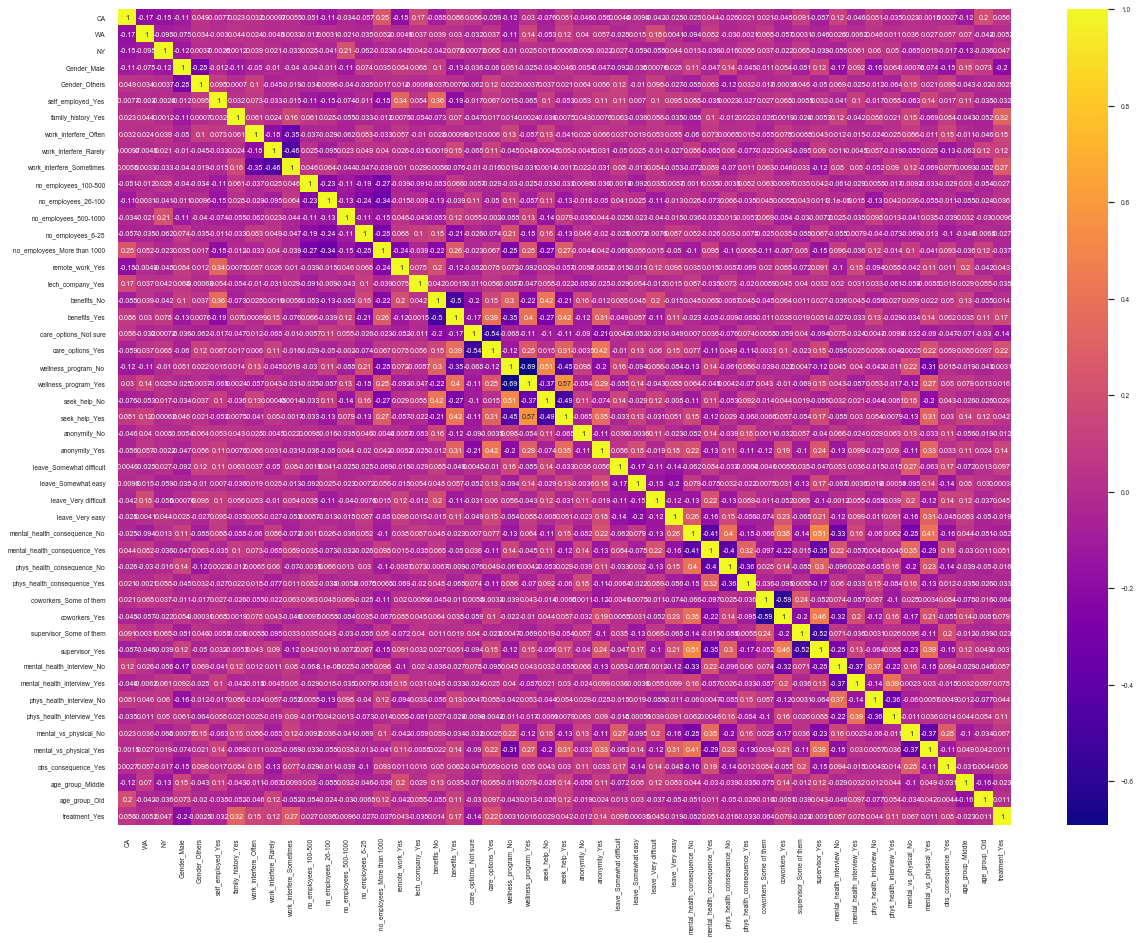

In [508]:
plt.figure(figsize=(20,15))
sns.set(font_scale=0.6)
sns.heatmap(training.corr(),annot=True,cmap='plasma')


Checking Multicollinearity

In [509]:
X_train=X_train[['CA','WA','NY','Gender_Male', 'family_history_Yes', 'work_interfere_Often',
       'work_interfere_Rarely',
        'care_options_Yes']]


In [510]:
X_train.shape,y_train.shape

((466, 8), (466,))

In [511]:
X_test=X_test[['CA','WA','NY','Gender_Male', 'family_history_Yes', 'work_interfere_Often',
       'work_interfere_Rarely',
        'care_options_Yes']]


In [512]:
X_test.shape,y_test.shape

((116, 8), (116,))

# Logistic 

In [521]:
accuracy=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log=LogisticRegression()
    log.fit(X_train,y_train)
    log_preds=log.predict(X_test)
    score=accuracy_score(log_preds,y_test)
    accuracy.append(score)
    
print(accuracy)
    

[0.8205128205128205, 0.7948717948717948, 0.7758620689655172, 0.8275862068965517, 0.8620689655172413]


In [522]:
np.array(accuracy).mean()

0.8161803713527851

In [456]:
print(classification_report(y_test,log_preds))
print(confusion_matrix(y_test,log_preds))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73        37
           1       0.84      0.99      0.91        79

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116

[[22 15]
 [ 1 78]]


# SVM

In [457]:
accuracy_svm=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc=SVC()
    svc.fit(X_train,y_train)
    svc_preds=svc.predict(X_test)
    score=accuracy_score(svc_preds,y_test)
    accuracy_svm.append(score)
    
print(accuracy_svm)

[0.8034188034188035, 0.7948717948717948, 0.7672413793103449, 0.7931034482758621, 0.8275862068965517]


In [458]:
np.array(accuracy_svm).mean()

0.7972443265546714

In [459]:
print(classification_report(y_test,svc_preds))
print(confusion_matrix(y_test,svc_preds))

              precision    recall  f1-score   support

           0       0.95      0.49      0.64        37
           1       0.80      0.99      0.89        79

    accuracy                           0.83       116
   macro avg       0.88      0.74      0.76       116
weighted avg       0.85      0.83      0.81       116

[[18 19]
 [ 1 78]]


TUNING

In [460]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[10,1,0.1,0.01,0.001,0.0001]}

In [461]:
grid=GridSearchCV(estimator=svc,param_grid=param_grid,verbose=3)

In [462]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.670, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.667, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.677, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.677, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.677, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.670, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.670, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.677, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.677, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.677, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.670, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ..................... C=10, gamma=0.1, score=0.677, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.710, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.720, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.809, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.806, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.828, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.785, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[CV] ................... C=1000, gamma=0.1, score=0.763, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.677, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.710, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.720, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.713, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.806, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.710, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [463]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [464]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [465]:
accuracy_grid_svm=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc=SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    svc.fit(X_train,y_train)
    grid_preds=svc.predict(X_test)
    score=accuracy_score(grid_preds,y_test)
    accuracy_grid_svm.append(score)
    
print(accuracy_grid_svm)

[0.8205128205128205, 0.811965811965812, 0.8189655172413793, 0.8103448275862069, 0.8448275862068966]


In [466]:
np.array(accuracy_grid_svm).mean()

0.821323312702623

In [467]:
print(classification_report(y_test,grid_preds))
print(confusion_matrix(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69        37
           1       0.82      0.99      0.90        79

    accuracy                           0.84       116
   macro avg       0.89      0.76      0.79       116
weighted avg       0.86      0.84      0.83       116

[[20 17]
 [ 1 78]]


# Bagging

In [468]:
accuracy_RF=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    RF=RandomForestClassifier()
    RF.fit(X_train,y_train)
    RF_preds=RF.predict(X_test)
    score=accuracy_score(RF_preds,y_test)
    accuracy_RF.append(score)
    
print(accuracy_RF)

[0.7777777777777778, 0.7606837606837606, 0.7155172413793104, 0.7844827586206896, 0.8017241379310345]


In [469]:
np.array(accuracy_RF).mean()

0.7680371352785146

In [470]:
RF_preds_test=RF.predict(X_test)
print(classification_report(y_test,RF_preds_test))

              precision    recall  f1-score   support

           0       0.89      0.43      0.58        37
           1       0.79      0.97      0.87        79

    accuracy                           0.80       116
   macro avg       0.84      0.70      0.73       116
weighted avg       0.82      0.80      0.78       116



# HYPERPARAMETER TUNING

In [430]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}


In [431]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [485]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [486]:
best_random_grid=rf_randomcv.best_estimator_

In [487]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.43      0.57        37
           1       0.78      0.96      0.86        79

    accuracy                           0.79       116
   macro avg       0.81      0.70      0.72       116
weighted avg       0.80      0.79      0.77       116

[[16 21]
 [ 3 76]]


In [483]:


param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}


In [484]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [488]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [489]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [494]:
accuracy_RF_grid=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    RF=RandomForestClassifier()
    RF.fit(X_train,y_train)
    RF_preds_grid=RF.predict(X_test)
    score=accuracy_score(RF_preds_grid,y_test)
    accuracy_RF_grid.append(score)
    
print(accuracy_RF_grid)

[0.7777777777777778, 0.7435897435897436, 0.7327586206896551, 0.7672413793103449, 0.8275862068965517]


In [495]:
np.array(accuracy_RF_grid).mean()

0.7697907456528146

# Boosting

In [496]:
import xgboost as xgb
from xgboost import XGBClassifier

In [497]:
accuracy_XG=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    XG=XGBClassifier(objective='binary:logistic')
    XG.fit(X_train,y_train)
    XG_preds=XG.predict(X_test)
    score=accuracy_score(XG_preds,y_test)
    accuracy_XG.append(score)
    
print(accuracy_XG)

[0.811965811965812, 0.8034188034188035, 0.75, 0.7931034482758621, 0.8103448275862069]


In [498]:
np.array(accuracy_XG).mean()

0.7937665782493368

In [499]:
print(classification_report(y_test,XG_preds))
print(confusion_matrix(y_test,XG_preds))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66        37
           1       0.82      0.92      0.87        79

    accuracy                           0.81       116
   macro avg       0.80      0.75      0.76       116
weighted avg       0.81      0.81      0.80       116

[[21 16]
 [ 6 73]]


# TUNING

In [500]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20,50],
    'n_estimators':[10,50,100,200,300]
    
}

In [501]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [477]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.755, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.806, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.817, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.785, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.688, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.787, total=   0.1s
[CV]  learning_rate=1, ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.796, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.785, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.785, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.787, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.796, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.763, total=   0.2s
[CV]

[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.777, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.806, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.742, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.742, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.763, total=   0.3s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.787, total=   0.5s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.796, total= 

[CV]   learning_rate=1, max_depth=50, n_estimators=100, score=0.763, total=   0.3s
[CV]  learning_rate=1, max_depth=50, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=50, n_estimators=200, score=0.755, total=   0.5s
[CV]  learning_rate=1, max_depth=50, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=50, n_estimators=200, score=0.806, total=   0.5s
[CV]  learning_rate=1, max_depth=50, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=50, n_estimators=200, score=0.753, total=   0.5s
[CV]  learning_rate=1, max_depth=50, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=50, n_estimators=200, score=0.742, total=   0.5s
[CV]  learning_rate=1, max_depth=50, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=50, n_estimators=200, score=0.742, total=   0.5s
[CV]  learning_rate=1, max_depth=50, n_estimators=300 ................
[CV]   learning_rate=1, max_depth=50, n_estimators=300, score=0.755, total= 

[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.774, total=   0.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.720, total=   0.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.777, total=   0.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.785, total=   0.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.688, total=   0.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.785, total=   0.6s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.710, 

[CV]   learning_rate=0.5, max_depth=20, n_estimators=300, score=0.806, total=   0.7s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=300, score=0.774, total=   0.7s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=300, score=0.753, total=   0.7s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=300, score=0.742, total=   0.7s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.787, total=   0.0s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.817, total=   0.0s
[CV]  learning_rate=0.5, max_depth=50, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=50, n_estimators=10, score=0.7

[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=0.688, total=   0.4s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.787, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.806, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.806, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.806, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.742, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.809, total=

[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.777, total=   0.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.817, total=   0.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.742, total=   0.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.731, total=   0.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.753, total=   0.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.777, total=   0.3s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.806

[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.785, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.787, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.796, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.763, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.774, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.763, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0

[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.742, total=   0.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.742, total=   0.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.763, total=   0.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=200, score=0.787, total=   0.5s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=200, score=0.796, total=   0.6s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=200, score=0.774, total=   0.5s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=10, n_estimators=200,

[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.755, total=   0.5s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.806, total=   0.8s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.753, total=   0.6s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.742, total=   0.6s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=200, score=0.742, total=   0.6s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=300 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=300, score=0.755, total=   0.8s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=300 .............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=300,

[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.774, total=   0.4s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.720, total=   0.4s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.777, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.785, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.688, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.785, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=300,

[CV]   learning_rate=0.001, max_depth=20, n_estimators=300, score=0.806, total=   0.7s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=20, n_estimators=300, score=0.774, total=   0.7s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=20, n_estimators=300, score=0.753, total=   0.7s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=20, n_estimators=300, score=0.742, total=   0.7s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=10, score=0.787, total=   0.0s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=10, score=0.817, total=   0.0s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators

[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20, 50],
                         'n_estimators': [10,

In [478]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

In [479]:
grid.best_estimator_

XGBClassifier( learning_rate=1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [523]:
accuracy_XG=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    XG=XGBClassifier(earning_rate=1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
    XG.fit(X_train,y_train)
    XG_preds=XG.predict(X_test)
    score=accuracy_score(XG_preds,y_test)
    accuracy_XG.append(score)
    
print(accuracy_XG)

[0.8034188034188035, 0.7948717948717948, 0.7758620689655172, 0.8103448275862069, 0.8448275862068966]


In [524]:
np.array(accuracy_XG).mean()

0.8058650162098437

In [525]:
print(classification_report(y_test,XG_preds))
print(confusion_matrix(y_test,XG_preds))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69        37
           1       0.82      0.99      0.90        79

    accuracy                           0.84       116
   macro avg       0.89      0.76      0.79       116
weighted avg       0.86      0.84      0.83       116

[[20 17]
 [ 1 78]]


# Conclusion

With the current knowledge that I have in ML,I selected the stratified K fold method to split the dataset as the target class was imbalanced. Then I did some feature selection through pearson correlation and also removed multicollinearity by just removing the features as the dataset is limited.After building all the models, I found that the Logistic seems to be an appropriate model resulting to a F1 score of 73 and 91 for  both classes No treatment and treatment respectively and the mean accuracy to be around 82%.It classifies decently for class 'Treatment_Yes' and also the TNR in this model is a little higher comparing to others, which can also tell if treatment is NOT required.


With more Data, Domain Knowledge and feature selection, the accuracy can be increased and might also lead to a different generalized model. But for now, I will go with the Logistic. 

Concluding, This model can help in suggesting as to whether an employee should consider seeking some sought of professional help, who can advise as to what kind of treatment/therapy is required.

